In [ ]:
%%capture
! pip install tensorflow-cpu
! pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
! pip install torchvision # hack to avoid an error due to the suppression of "torch.autograd"

In [3]:
## common libraries :
import matplotlib.pyplot as plt # Matplotlib is a plotting library for the Python but it has also some IO functions
import numpy as np #numpy is the "standard" Python library used to manipulate array and provides mathematical function
import pandas as pd
import random

## image and plot
import cv2

## file gestion :
from pathlib import Path # lib to handle filesystem paths with semantics appropriate for different OS
import os
import json


## tensorflow and keras :
# ! pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
import keras # Keras is our Deep Learning framework
# from dlutils import unpreprocess, plot_confusion_matrix, create_subdataset ## an error 

## set global variables :
DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P6/"
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P6/"

In [51]:
from sklearn.preprocessing import LabelBinarizer


# Classez des images à l'aide d'algorithmes de Deep Learning

## Le projet : 
Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Vous vous demandez donc ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc obtenir un algorithme capable de classer les images en fonction de la race du chien présent sur l'image.
Les données

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous entraînerez votre algorithme en utilisant le Stanford Dogs Dataset.
Votre mission

L'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

Vous avez peu d’expérience sur le sujet, vous décidez donc de contacter un ami expert en classification d’images.

Il vous conseille dans un premier temps de pré-processer des images avec des techniques spécifiques (e.g. whitening, equalization, éventuellement modification de la taille des images) et de réaliser de la data augmentation (mirroring, cropping...).

Ensuite, il vous incite à mettre en œuvre deux approches s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels), que vous comparerez en termes de temps de traitement et de résultat :

* Une première en réalisant votre propre réseau CNN, en vous inspirant de réseaux CNN existants. Prenez soin d'optimiser certains hyperparamètres (des layers du modèle, de la compilation du modèle et de l’exécution du modèle)
* Une deuxième en utilisant le transfer learning, c’est-à-dire en utilisant un réseau déjà entraîné, et en le modifiant pour répondre à votre problème.

Concernant le transfer learning, votre ami vous précise que :

* Une première chose obligatoire est de réentraîner les dernières couches pour prédire les classes qui vous intéressent seulement.
* Il est également possible d’adapter la structure (supprimer certaines couches, par exemple) ou de réentraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

Ressources de calcul

Votre ami vous alerte sur le fait que l'entraînement (même partiel) d'un réseau de neurones convolutionnels est très gourmand en ressources. Si le processeur de l’ordinateur un peu ancien de l’association ne suffit pas, il vous propose plusieurs solutions :

* Limitez le jeu de données, en ne sélectionnant que quelques classes (races de chiens), ce qui permettra déjà de tester la démarche et la conception des modèles, avant une éventuelle généralisation.
* Utilisez la carte graphique de l’ordinateur en tant que GPU (l'installation est un peu fastidieuse, et l'ordinateur est inutilisable le temps du calcul).

C'est l'occasion de vous initier au cloud computing, qui permet d'avoir temporairement accès à des machines très puissantes, en étant facturé seulement durant le temps d'utilisation. Le plus connu est AWS, mais d'autres existent (Google, Microsoft...).

Vous pouvez tester également Google Colaboratory qui permet de mettre en œuvre gratuitement des réseaux CNN utilisant de la GPU.
Livrables attendus

* Un notebook Python (non cleané, pour comprendre votre démarche).
* Un programme Python qui prend une image (array) en entrée et retourne la race la plus probable du chien présent sur l'image.
* Votre support de présentation à destination du bénévole qui gère la base de données, qui devra déployer en production la solution que vous préconisez.

Pour faciliter votre passage au jury, déposez sur la plateforme, dans un dossier nommé “P6_nom_prenom”, tous les livrables du projet. Chaque livrable doit être nommé avec le numéro du projet et selon l'ordre dans lequel il apparaît, par exemple “P6_01_notebook”, “P6_02_programme”, et ainsi de suite.
Modalités de la soutenance 

Ce projet fera l'objet d'une soutenance filmée auprès d'un mentor validateur.

Votre soutenance durera 25 minutes, découpées ainsi (à titre indicatif) :

* 5 min - Présentation de la problématique, du cleaning effectué, du feature engineering et de l'exploration
* 10 min - Présentation des différentes pistes de modélisation effectuées
* 10 min - Présentation du modèle final sélectionné (pour chaque approche) ainsi que des performances et améliorations effectuées
* 5 à 10 minutes de questions-réponses

Ressources complémentaires
1) Prétraitement des images 

Présentation d’une technique de preprocessing : le whitening.
Ce tutoriel présente les concepts de data augmentation. À vous de voir si cela peut améliorer vos performances sur ce projet !
Présentation d’une autre technique de preprocessing : l’equalization.
Deux cours sur le pre-processing d’images : le premier est succinct et illustre les techniques, c’est une bonne première approche ; le second fournit beaucoup de détails qui permettent de mieux appréhender les cas d’utilisation des différents filtres, notamment.

2) CNN et transfer learning

Guide d’utilisation de Google Colaboratory avec GPU.
Une présentation du transfer learning, ses avantages, les cas d’application et un exemple de code en Keras. 

## Plan du notebook :


Pour faciliter la lecture, il est possible de revenir à ce sommaire, en cliquant sur [back to menu](#menu) chaque fois qu'il apparaît. A partir de ce menu, il est possible de naviguer entre les parties en cliquant sur leur titre.


<a id ="menu"></a>
1. [Importer les données](#section1)
    1. [téléchargement](#section1.1)
    2. [images train et test](#section1.2)
    3. [annotations et labels](#section1.3)
    
2. [Pré-process des images](#section2)
    1. [whitening](#section2.1)
    2. [equalization](#section2.2)
    3. [modification de la taille des images](#section2.3)
    4. [data augmentation (mirroring, cropping...)](#section2.4)
    5. [automatisation du preprocess](#section2.5)

3. [Mon réseau CNN](#section3)
    1. [bibliographie pour réaliser ce travail](#section3.1)
          1. [modèles de réseau CNN](#section3.1.1)
          2. [fonction de cout](#section3.1.2)
          3. [adaptative Learning ](#section3.1.3)  
    2. [création du CNN](#section3.2)
          1. [préparation des données](#section3.2.1)
          2. [le CNN LeNet5 et les paramètres à fixer](#section3.2.2)
          3. [optimisation des paramètres](#section3.2.3)       
    3. [Optimisation des hyperparamètres (des layers du modèle, de la compilation du modèle et de l’exécution du modèle)](#section2.2)
    
    
4. [ Transfert learning](#section4)
    1. [Choix du modèle pré-entrainé](#section4.1)
    2. [Choix de la bibliothèque pour faire le transfert](#section4.2)
    3. [Remove time - consuming models](#section4.3)

    Adapter la structure (supprimer certaines couches),
    Réentraîner le modèle avec un très faible learning rate  

<a id ="section1"></a>
<a id ="section1.1"></a>

[back to menu](#menu)

# 1. Importer les données :
## 1.A Téléchargement :

Let's download a sample of the data :

In [4]:
if not os.path.isdir(DATA_PATH+"Images/"):
    print("downloading Images")
    ! wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
    ! tar xf images.tar --directory "/home/clairegayral/Documents/openclassroom/data/P6/"

# if not os.path.isdir(DATA_PATH+"train"):
# test_index = open(DATA_PATH+"test_data.mat","rb").read()
# test_index[:1000]

Let's get the file directories :

In [6]:
d_type = 'train'

## if I want to use the 100 dog by class proposed by the author of dataset :
# if not os.path.isdir(DATA_PATH + d_type):
if not os.path.isfile(RES_PATH + "list_" + d_type + "_imgdir.txt"): 
    print("extract list of filename")
    ## extract train and test sample list from .mat :
    import scipy.io
    mat = np.array(scipy.io.loadmat(DATA_PATH + d_type + "_data.mat")[d_type + "_info"][0][0][0])
    list_filedir = []
    for tmp in mat :
        list_filedir.append(tmp[0][0])
    open(RES_PATH + "list_" + d_type + "_imgdir.txt", "w").write('\n'.join(list_filedir))

list_filedir = open(RES_PATH + "list_" + d_type + "_imgdir.txt", "r").read()
list_filedir = list_filedir.split("\n")

Je n'ai pas besoin de l'intégralité du jeu de donné, je sélectionne 4 races prises au hasard. Ensuite, je copie l'ensemble train et test dans des fichiers à part. J'ai commenté cette partie pour garder les mêmes images pour travailler. 

In [7]:
## but I think I'd better choose K=4 races randomly :
K=4
list_races = np.unique([filename.split("/")[0] for filename in list_filedir])
# list_races = 
random.shuffle(list_races)
# print(list_races[:K]) ## copy brut just after :
sample_races = ['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier',
                'n02113799-standard_poodle', 'n02097298-Scotch_terrier']
print(sample_races)

# test_size = 0.2 #20% test and 80% train 
# ## save the filenames and copy the images in resp. train/ and test/
# train_filenames = {}
# test_filenames = {}
# Path(DATA_PATH+"train/").mkdir(parents=True, exist_ok=True)
# Path(DATA_PATH+"test/").mkdir(parents=True, exist_ok=True)

# for race in sample_races:
#     ## get the list of images and random shuffle
#     race_filenames = os.listdir(DATA_PATH+"Images/"+race+"/")
#     random.shuffle(race_filenames)
#     ## split the list into train and test :
#     n_test = int(np.floor(len(race_filenames)*test_size))
#     race_test = race_filenames[:n_test]
#     race_train = race_filenames[n_test:]
#     ## save in dict :
#     train_filenames[race] = race_train
#     test_filenames[race] = race_test
#     ## copy in file : 
#     for filename in race_train :
#         ## copy image : 
#         f = open(DATA_PATH+"Images/"+race+"/" + filename , 'rb').read()
#         open(DATA_PATH+"train/"+filename, 'wb').write(f)
#         ## copy annotations :
#         ann_name = filename.split(".")[0]
#         f = open(DATA_PATH + "Annotation/" + race + "/" + ann_name , 'r').read()
#         open(DATA_PATH + "train/" + ann_name, 'w').write(f)

#     for filename in race_test :
#         # ## copy train : 
#         f = open(DATA_PATH+"Images/"+race+"/" + filename , 'rb').read()
#         open(DATA_PATH+"test/"+filename, 'wb').write(f)
#         ## copy annotations :
#         ann_name = filename.split(".")[0]
#         f = open(DATA_PATH + "Annotation/" + race + "/" + ann_name , 'r').read()
#         open(DATA_PATH + "test/" + ann_name, 'w').write(f)
# with open(DATA_PATH + "test_dict_filename.json", 'w') as fp:
#     json.dump(test_filenames, fp)
# with open(DATA_PATH + "train_dict_filename.json", 'w') as fp:
#     json.dump(train_filenames, fp)

with open(DATA_PATH + "train_dict_filename.json", 'r') as fp:
    train_filenames = json.load(fp)
with open(DATA_PATH + "test_dict_filename.json", 'r') as fp:
    test_filenames = json.load(fp)
                               
list_train_filename = [x for v in train_filenames.values() for x in v]
list_test_filename = [x for v in test_filenames.values() for x in v]

['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier', 'n02113799-standard_poodle', 'n02097298-Scotch_terrier']


<a id ="section1.2"></a>
[back to menu](#menu)

## 1.B Images train et test
Il a l'air classic d'enregistrer les images dans un array comme suit :

In [8]:
## init X_train
X_train = []
for filename in list_train_filename :
#     image = cv2.imread(DATA_PATH+"train/"+filename,0) # grayscale
    image = cv2.imread(DATA_PATH+"train/"+filename)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_train.append(image)
# X_train = np.array(X_train)
print("X_train =", len(X_train), "images of different shapes")

X_train = 534 images of different shapes


In [9]:
X_test = []
for filename in list_test_filename :
    image = cv2.imread(DATA_PATH+"test/"+filename)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_test.append(image)
# X_test = np.array(X_test) #image does not have the same shape ...    
print("X_trains shape =", len(X_test), "images of different shapes")

X_trains shape = 131 images of different shapes


<a id ="section1.3"></a>
[back to menu](#menu)

## 1.C Annotations et labels  :

Il faut extraire l'information de labelisation des images. Les annotations sont au format "PASCAL VOC format", et [cette page de stackoverflow](https://stackoverflow.com/questions/53317592/reading-pascal-voc-annotations-in-python) permet d'extraire de ce format XML la localisation des boites ainsi que le label.

In [10]:
# open(DATA_PATH + "train/" + ann_name, 'r').read()

import xml.etree.ElementTree as ET

def read_content(xml_file: str):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    list_with_all_boxes = []
    for boxes in root.iter('object'):
        filename = root.find('filename').text
        ymin, xmin, ymax, xmax = None, None, None, None
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)
        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)
    return filename, list_with_all_boxes

filename = list_train_filename[0]
ann_name = filename.split(".")[0]
name, boxes = read_content(DATA_PATH + "train/" + ann_name)
name, boxes

('n02110185_5871', [[57, 5, 441, 322]])

Je ne sais pas encore si je vais utiliser ces annotations pour ce projet, je vais pour le moment me contenter de labels de classification 1,2,3,4 pour les 4 races que je cherche à prédire : 

In [34]:
list_train_filename
sample_races = ['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier',
                'n02113799-standard_poodle', 'n02097298-Scotch_terrier']

race_table = pd.DataFrame(columns=["file_name","race","label", "ref"])
for k in range(len(sample_races)):
    race = sample_races[k]
    race_table.loc[k,"file_name"] = race
    race_table.loc[k,"race"] = race.split("-")[1] 
    race_table.loc[k,"label"] = k
    race_table.loc[k,"ref"] = race.split("-")[0] 
race_table

file_name             race label        ref
0               n02110185-Siberian_husky   Siberian_husky     0  n02110185
1  n02098105-soft-coated_wheaten_terrier             soft     1  n02098105
2              n02113799-standard_poodle  standard_poodle     2  n02113799
3               n02097298-Scotch_terrier   Scotch_terrier     3  n02097298

In [35]:
## get train labels 
Y_train = []
for filename in list_train_filename:
    ref = filename.split("_")[0]
    label = int(race_table[race_table.ref == ref].label)
    Y_train.append(label)
Y_train = np.array(Y_train)
print("Y_train shape =", Y_train.shape)
## get test labels
Y_test = []
for filename in list_test_filename:
    ref = filename.split("_")[0]
    label = int(race_table[race_table.ref == ref].label)
    Y_test.append(label)
Y_test = np.array(Y_test)
print("Y_tests shape =", Y_test.shape)

Y_train shape = (534,)
Y_tests shape = (131,)


<a id ="section2"></a>
<a id ="section2.1"></a>

[back to menu](#menu)

# 2. Pré-process des images

## 2.A. Whitening
En suivant [le tutoriel donné dans les ressources du projet](http://mccormickml.com/2024/07/24/intuition-behind-whitening-image-patches/), sur deux de mes images d'entrainement : 

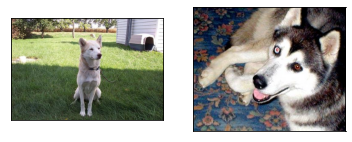

In [11]:
## image 2 
plt.subplot(1,2,1)
filename1 = list_train_filename[1]
image1 = cv2.imread(DATA_PATH+"train/"+filename1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.xticks([]), plt.yticks([])

## image 2 
plt.subplot(1,2,2)
filename2 = list_train_filename[2]
image2 = cv2.imread(DATA_PATH+"train/"+filename2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.xticks([]), plt.yticks([]) 
plt.show()

(333, 500, 3) (294, 360, 3)


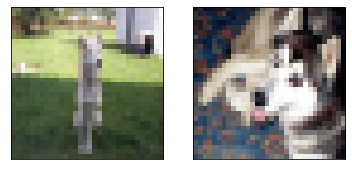

(32, 32, 3) (32, 32, 3)


In [12]:
## images must have same shape for this process ... I reshape :
print(image1.shape, image2.shape)
# width = min(image1.shape[0], image2.shape[0])
# height = min(image1.shape[1], image2.shape[1])
width = 32
height = 32


dim = (width, height)
# resize image
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA)
image2 = cv2.resize(image2, dim, interpolation = cv2.INTER_AREA)

## check reshize deformation :
plt.subplot(1,2,1)
plt.imshow(image1)
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(image2)
plt.xticks([]), plt.yticks([]) 
plt.show()
print(image1.shape, image2.shape)

In [13]:
X = np.array([image1,image2])

## flatten image :
print("Original image shape : ", X.shape)

X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print("Flatten image shape : ", X.shape)
X.shape

Original image shape :  (2, 32, 32, 3)
Flatten image shape :  (2, 3072)


(2, 3072)

X.min() 0.0
X.max() 1.0
X means by pixel = [0.30196078 0.25686275 0.25098039 ... 0.10588235 0.13137255 0.11176471]
X means by pixel after centering = [ 0.00000000e+00  2.77555756e-17  1.38777878e-17 ... -6.93889390e-18
  0.00000000e+00  0.00000000e+00]


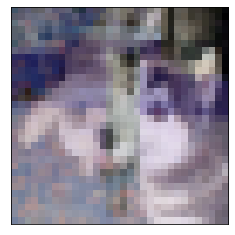

In [14]:
## 1. rescale the images
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())
## 2. Subtract the mean from all images
print("X means by pixel =",X_norm.mean(axis=0))
X_norm = X_norm - X_norm.mean(axis=0)
print("X means by pixel after centering =",X_norm.mean(axis=0))
cov = np.cov(X_norm, rowvar=False)

U,S,V = np.linalg.svd(cov)
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
plt.imshow(X_ZCA_rescaled[1,:].reshape(32,32,3))
plt.xticks([]), plt.yticks([]) 
plt.show()


Même pour deux images en 32x32 cette opération prend plusieurs secondes ... J'ai donc été voir s'il y avait des implémentations plus rapides. La suivante est faite image par image, et sans la flattenisation et centré-réduire. Elle a l'ai d'être faite en niveaux de gris.

La référence qui m'a éclairée : http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

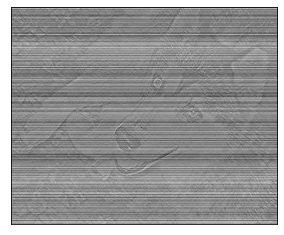

In [15]:
## compute ZCA transfo (including center reduce in fun) : 
def zca_whitening_matrix(image, epsilon=1e-5):
    '''
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    main ideas from https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python
    same function in : https://www.it-swarm-fr.com/fr/python/comment-mettre-en-oeuvre-le-blanchiment-zca-python/1054657420/
     
    Parameters:
    -----------------------------------------
    image: [M x N] matrix.
            Rows: Variables 
            Columns: Observations 
    epsilon = 1e-5 : Whitening constant, prevents division by zero
    
    Returns:
    -----------------------------------------
    Transition matrix ZCAMatrix: [M x M] matrix
    '''   
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(image, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

gray1 = cv2.imread(DATA_PATH+"train/"+filename2,0)
ZCAMatrix = zca_whitening_matrix(gray1,0.01) # get X_ZCA
image_whitened = np.dot(ZCAMatrix, gray1)
plt.imshow(image_whitened,"gray")
plt.xticks([]), plt.yticks([]) 
plt.show()

Deux remarques avant de passer à la suite :
1. tensorflow routine : 
Le whitening fait partie des pre-process implémentés dans tensorflow. Je reviendrai dessus à la fin de cette partie :

In [16]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)


2. Dans le cadre d'un autre projet, j'ai pu essayer d'autre méthodes qui ont l'air plus rapide comme la détection de contour ou de texture

<a id ="section2.2"></a>

[back to menu](#menu)

## 2.B. Equalization
J'ai directement fait appel à l'implémentation proposée dans [la documentation d'openCV](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html) à ce sujet

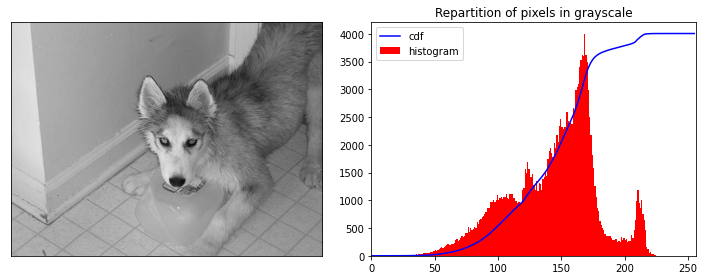

In [17]:
filename = list_train_filename[3]
image = cv2.imread(DATA_PATH+"train/"+filename,0)

## compute hist 
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

## plot imgae + hist
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, "gray")
plt.xticks([]), plt.yticks([]) 

plt.subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Repartition of pixels in grayscale")
plt.tight_layout()
plt.show()

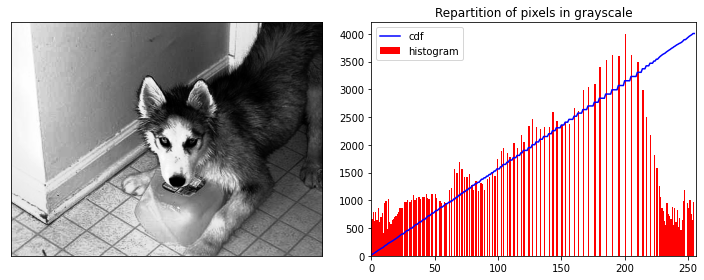

In [18]:
## compute equalization : 
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

image_eq = cdf[image]

## compute hist of eq. image :
hist,bins = np.histogram(image_eq.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

## plot 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image_eq, "gray")
plt.xticks([]), plt.yticks([]) 

plt.subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_eq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Repartition of pixels in grayscale")
plt.tight_layout()
plt.show()


<a id ="section2.3"></a>

[back to menu](#menu)

## 2.C. Modification de la taille des images 
J'ai déjà vu, dans la partie sur le whitening comment changer la taille des images. La question va être quelle taille prendre lorsque l'ensemble des images n'a pas de taille commune. J'ai vu que pour certaines méthode (dès qu'on a à calculer la covariance des pixels) la taille de l'image est vite problématique (compléxité en n $\times$ p). 

Il pourrait être intéressant, plutôt que de déformer l'image, en prendre 4 carrés de même taille, en se basant sur l'hypothèse que le chien est plutôt au centre de la photo, cela pourrait former une forme de data augmentation en même temps ...

Dans cette partie je propose de faire simple et prendre une taille arbitraire, transformer mon image en la tordant (inférence des pixels par aire).

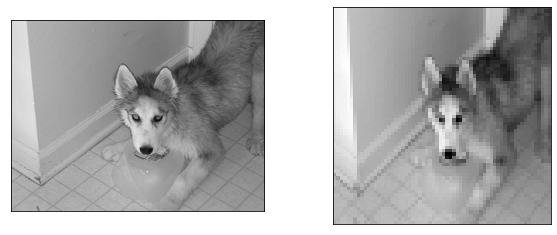

In [19]:
filename = list_train_filename[3]
image = cv2.imread(DATA_PATH+"train/"+filename,0)

## choose dimension :
width = 64
height = 64
# width = min(image1.shape[0], image2.shape[0])
# height = min(image1.shape[1], image2.shape[1])

## resize image
dim = (width, height)
image_rescaled = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

##plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(image_rescaled, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

J'enregistre les images de train en couleur, et de même taille dans une liste "X_train_reshape", comme je l'ai vu faire dans différents codes. Pour choisir la "bonne taille" commune, je propose de regarder la distribution des hauteurs et largeurs des images :

<AxesSubplot:>

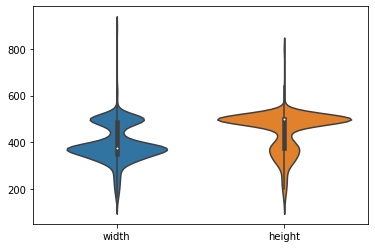

In [20]:
import seaborn as sns
train_shapes = pd.DataFrame()
for k in range(len(X_train)) :
    image = X_train[k]
    train_shapes.loc[k,"width"] = image.shape[0]
    train_shapes.loc[k,"height"] = image.shape[1]
sns.violinplot(data = train_shapes)

Il y a deux modes, ce qui est assez logique (image verticale VS horizontale). Je vais donc retourner de 90° les images verticales puis choisir le re-dimensionnement qui correspond à la moyenne de cette nouvelle distribution

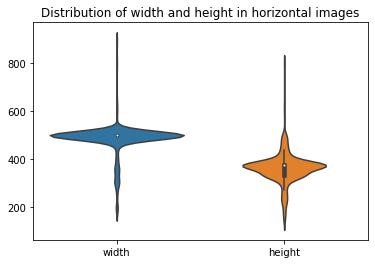

In [21]:
train_shapes = pd.DataFrame()
X_train_horizontal = X_train.copy()
for k in range(len(X_train)) :
    image = X_train[k]
    width, height, s = image.shape
    if height > width : ## rotation 90°
        X_train_horizontal[k] = image.transpose(1, 0, 2)
        train_shapes.loc[k,"width"] = image.shape[1]
        train_shapes.loc[k,"height"] = image.shape[0]
    else : 
        train_shapes.loc[k,"width"] = image.shape[0]
        train_shapes.loc[k,"height"] = image.shape[1]
sns.violinplot(data = train_shapes)
plt.title("Distribution of width and height in horizontal images")
plt.show()

Mieux ! On extrait donc la largeur et la hauteur médiane :

In [22]:
# width = 64
# height = 64

width = int(train_shapes.width.median())
height = int(train_shapes.height.median())
print("width =", width,", height =", height)
dim = (width, height)

## init X_train
X_train_reshape = []
for image in X_train_horizontal :
    ## resize image
    image_rescaled = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    X_train_reshape.append(image_rescaled)
X_train_reshape = np.array(X_train_reshape)    
print("X_trains shape =", X_train_reshape.shape)

width = 500 , height = 375
X_trains shape = (534, 375, 500, 3)


In [23]:
## similar operation on X_test :
## init X_train
X_test_reshape = []
for image in X_test :
    width, height, s = image.shape
    if height > width : ## rotation 90°
        image = image.transpose(1, 0, 2)  
    image_rescaled = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    X_test_reshape.append(image_rescaled)
X_test_reshape = np.array(X_test_reshape)
print("X_test shape =", X_test_reshape.shape)

X_test shape = (131, 375, 500, 3)


Une fois les 534 images au même format (64 $\times$ 64 ou choisi plus finement), et les labels correspondants isolés, il me semble pratique de faire appel à "keras.preprocessing.image.ImageDataGenerator" pour gérer l'intégralité des process (avec des codes qui seront très certainement optimisés) : 

In [24]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
datagen.fit(X_train_reshape)

In [36]:
batch_size = 128
datagen.flow(X_train_reshape, Y_train,batch_size=batch_size)

Le whitening est vraiment très long à tourner ... à voir s'il améliore vraiment beaucoup les performances.

<a id ="section2.4"></a>

[back to menu](#menu)

## 2.D Data augmentation : 
Dans cette partie, on s'intéresse à la [data augmentation](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/), c'est-à-dire "comment augmenter le jeu d'apprentissage sans trop biaiser les données". Il y a des opérations simples comme retourner l'image ([flip](https://techtutorialsx.com/2019/04/21/python-opencv-flipping-an-image/)), appeler son mirroir (mirroring), appliquer une rotation ([rotating](https://note.nkmk.me/en/python-opencv-numpy-rotate-flip/)). Il est aussi possible d'en extraire des sous-images ([cropping](https://learnopencv.com/cropping-an-image-using-opencv/), c'est l'idée que j'avais eu lorsque je proposais d'extraire des timbre de la même taille plutôt que de déformer l'image dans l'opération de "reshape"). Toutes ces méthodes sont dans les prétraitements de keras, et illustrées dans [ce tutoriel](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/). 

In [37]:
## TODO : Si j'ai le temps, les appeler pour illustrer à la main ...
datagen_kwargs = {}
## Random Rotation
datagen_kwargs["rotation_range"] = 90

## Random shift
datagen_kwargs["width_shift_range"] = 0.2

## Random Flips
datagen_kwargs["horizontal_flip"] = True
datagen_kwargs["vertical_flip"] = False # rare de trouver des chiens à l'envers

## Random Zoom 
datagen_kwargs["zoom_range"] = [0.5,1.0]

## Random brightness 
datagen_kwargs["brightness_range"] = [0.2,1.0]

## add preprocess choices :
datagen_kwargs["zca_whitening"] = False # whitening, turned to False because ZCA really long
datagen_kwargs["featurewise_center"]=True # centering pixel distribution between images
datagen_kwargs["featurewise_std_normalization"]=True # Standardize pixel distribution between images

## launch image data generator :
datagen = ImageDataGenerator(**datagen_kwargs)
datagen.fit(X_train_reshape)
datagen.flow(X_train_reshape, Y_train, batch_size=32)

<a id ="section2.5"></a>

[back to menu](#menu)

## 2.E Automatisation du preprocess : 
Comme je l'ai évoqué précédement, je compte utiliser le framework de keras pour faire ces pré-traitements. La documentation de l'API est [dans ce lien](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). 

Voilà le rappel des paramètres et valeurs :

In [38]:
datagen_kwargs = {}
## preprocess 
datagen_kwargs["zca_whitening"] = False # whitening, turned to False because ZCA really long
datagen_kwargs["featurewise_center"]=True # centering pixel distribution between images
datagen_kwargs["featurewise_std_normalization"]=True # Standardize pixel distribution between images

## data augmentation 
datagen_kwargs["rotation_range"] = 90 # rotation
datagen_kwargs["width_shift_range"] = 0.2 # shift
datagen_kwargs["horizontal_flip"] = True # flips horizontal
datagen_kwargs["vertical_flip"] = True # flips vertical 
datagen_kwargs["zoom_range"] = [0.5,1.0] # zoom 
datagen_kwargs["brightness_range"] = [0.2,1.0] # brightness 

In [39]:
## call API and save in RES path
datagen = ImageDataGenerator(**datagen_kwargs)
# fit parameters from data
datagen.fit(X_train_reshape)
# configure batch size and retrieve one batch of images
#
from pathlib import Path
Path(RES_PATH + "data_augmentation").mkdir(parents=True, exist_ok=True)
## save batch in a the directory
# datagen.flow(X_train_reshape, Y_train, batch_size=1000, 
#              save_to_dir=RES_PATH + "data_augmentation/", 
#              save_prefix='aug', save_format='png').next()
## keep it in a variable :
train_loader = datagen.flow(X_train_reshape, Y_train, batch_size=32)
validation_loader = datagen.flow(X_test_reshape, Y_test, batch_size=32)


<a id ="section3"></a>
<a id ="section3.1"></a>

[back to menu](#menu)

# 3. Mon réseau CNN
## 3.A La bibliographie pour réaliser ce travail :

J'ai lu pas mal de choses sur les CNN ou réseaux simples. Pour les maths qui sont derrière, [celui-là](https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65) est le plus clair que j'ai trouvé.

Coté code,j'ai beaucoup hésité entre la biliothèque classique keras, ou une surcouche, "fastai", qui a aussi un module de [data augmentation](https://docs.fast.ai/vision.augment.html) très complète et surtout qui permet de tracer le learning rate très facile (cf [ce kaggle](https://www.kaggle.com/residentmario/finding-an-optimal-learning-rate-with-lr-finder)). J'ai décidé de rester sur keras. 
* https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0

nb : Pour cette partie, je vais travailler en local. Or ma machine n'a pas de GPU, il faudra bien penser à changer de support si je veux passer sur une machine qui a une carte graphique. En attendant, bien penser à "pip install tensorflow-cpu".

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

<a id ="section3.1.1"></a>
[back to menu](#menu)

### 3.A.a Choix du modèle de réseau CNN existants

Les 3 types de modèles explorés :

#### Fully connected : 
Modèle simple et classique, Multi-Layer Perceptron (MLP) aussi appelé "Fully Connected Network" est l'un des premier réseau imaginé dès 1940. Il suffit de construire des couches "Denses", comme illustré [dans ce blog](https://www.machinecurve.com/index.php/2019/07/27/how-to-create-a-basic-mlp-classifier-with-the-keras-sequential-api/) (cet article résume aussi l'historique du modèle).

La construction d'un réseau dense à 5 couches, avec respectivement 10, 10, 20, 20, et 10 noyaux, avec une couche d'activation par [softmax](https://fr.wikipedia.org/wiki/Fonction_softmax) s'écrit alors : 

In [98]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

model_mlp = Sequential()
model_mlp.add(Dense(10, input_shape=(32*32*3,)))
model_mlp.add(Dense(10))
model_mlp.add(Dense(20))
model_mlp.add(Dense(20))
model_mlp.add(Dense(10))
model_mlp.add(Activation('softmax'))

model_mlp.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                30730     
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 dense_40 (Dense)            (None, 20)                220       
                                                                 
 dense_41 (Dense)            (None, 20)                420       
                                                                 
 dense_42 (Dense)            (None, 10)                210       
                                                                 
 activation_4 (Activation)   (None, 10)                0         
                                                                 
Total params: 31,690
Trainable params: 31,690
Non-tra

#### Dropout :
Comme les réseaux denses impliquent un très grand nombre de poids à calculer, il est possible d'ajouter une couche de "dropout" pour retirer les noeuds peu influents : 

In [79]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

model_dropout = Sequential()
model_dropout.add(Dense(10, input_shape=(32*32*3,)))

model_dropout.add(Dense(10))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(20))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(20))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))

model_dropout.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                30730     
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_27 (Dense)            (None, 20)                220       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_28 (Dense)            (None, 20)                420       
                                                                 
 dropout_4 (Dropout)         (None, 20)               

Ces structures permettent de bien comprendre les principes qu'on empile, mais l'objectif de la mission est d'implémenter un CNN, c'est-à-dire un réseau de neuronnes convolutionnel. Il s'agit d'appliquer dans une couche une opération de convolution. [Cet article ](https://www.machinecurve.com/index.php/2019/09/17/how-to-create-a-cnn-classifier-with-keras/) explique très bien l'idée génerale de la convolution, et comment implémenter des CNN. 

In [87]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
input_shape = (64,64,3)
# init
model = Sequential()
# convolutionnal layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# convolutionnal layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
## dense layer with relu and activation 
model.add(Dense(256, activation='relu'))
model.add(Dense(n_class, activation='softmax'))

#### VGG style 
Dans [cet article de blog](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/), il est proposé de construire un CNN avec keras sur le [format VGG](https://arxiv.org/abs/1409.1556)

In [81]:
model_vgg = Sequential()

## 1 block VGG-style :
model_vgg.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same'))
model_vgg.add(MaxPooling2D((2, 2)))

## classif :
model_vgg.add(Flatten())
model_vgg.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_vgg.add(Dense(n_class, activation='softmax'))

model_vgg.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_32 (Dense)            (None, 32)                262176    
                                                                 
 dense_33 (Dense)            (None, 4)                 132       
                                                      

#### ResNet Structure

Les structures ResNet sont un peu plus complexes, car elles font appel à une mémoire de plusieurs couches précédentes pour calculer les poids de la suivante. Pour illustrer cela, voilà la structure théorique illustrée dans [cet article](https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624) ou [celui là](https://medium.com/@waya.ai/deep-residual-learning-9610bb62c355)

<!-- ![alt text](ResNet_structure.png "ResNet")  -->
![alt text](idee_resnet.png "ResNet") 

Ainsi, je ne ferai appel à ces réseaux que dans la deuxième partie (pour le transfert)


#### Autres architectures, LeNet

D'autres CNN assez classiques sont listés dans [cet article](https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5), écrit par Siddharth Das ou encore dans [celui-là](https://www.jeremyjordan.me/convnet-architectures/) écrit par Jeremy Jordan. Au sujet des CNN en général, [cet article](https://www.machinecurve.com/index.php/2018/12/07/convolutional-neural-networks-and-their-components-for-computer-vision/#layer-structure-in-a-cnn) détaille le rôle de chaque couche, et comment elle fonctionne.


Il me semble intéressant de rester, dans ce projet, sur le réseau le plus simple présenté dans ces articles. Il s'agit de [LeNet-5](http://yann.lecun.com/exdb/lenet/), un réseau constitué de 7 couches :
* Convolution en 28x28, sur 6 noeuds,
* Sous-échantillonnage (pooling) sur 6 noeudsm en 14x14
* Convolution en 10x10 sur 16 noeuds
* Pooling sur 16 noeuds en 5x5
* Une dernière couche dite "de convolution", mais qui est juste une couche dense, fixée à 120 noeuds de taille 1x1, 
* Une couche cachée dense fixée à 84 par les auteurs du papier original, pour la classification des lettres au format ASCII, c'est à dire la classification de 80 caractères, codés sur des images en noir et blanc de dimension 7x12 (= 84). 
* L'activation en softmax, avec 10 noeuds, pour les 10 chiffres. Dans mon application, je n'aurai que 4 races de chiens. 

Chaque couche est bien plus détaillée dans [cet article](https://inblog.in/Understand-the-LeNet-5-Convolution-Neural-Network-hwxCO5u7pT).

Nb : 
1. les images d'entrée doivent être en 32x32 et en noir et blanc. 
2. dans le papier original (1998), la fonction d'activation était "tanh" pour les convolutions. Depuis, il semble plus commun de prendre l'activation "Relu", chose que je fais dans mon réseau.
3. il est aussi proposé une fonction d'activation "RBF", que je remplace par un softmax.

In [155]:
model_lenet5 = Sequential()

## 1 block VGG-style :
## C1 : conv 6@28x28 -> 28 = 32 - 5 + 1 
model_lenet5.add(Conv2D(filters=6, kernel_size=(5,5), 
                        activation='relu', kernel_initializer='he_uniform',
                        input_shape=(32, 32, 1)))
## S2 : sampling 6@14x14 -> 14 = 28 / 2
model_lenet5.add(AveragePooling2D(pool_size=2))

## C3 :conv 16@10x10
model_lenet5.add(Conv2D(filters=16, kernel_size=(5,5), 
                        activation='relu', 
                        kernel_initializer='he_uniform',
                        input_shape=(14, 14, 6)
                       ))

## S4 : sampling 16@5x5
model_lenet5.add(AveragePooling2D(pool_size=2))

## C5 : conv to 1x1 
model_lenet5.add(Conv2D(filters=120, kernel_size=(5,5), 
                        activation='relu', 
                        kernel_initializer='he_uniform',
                        input_shape=(5, 5, 16)
                       ))

## F6 : fully connected layer -> arbitrary taken at 100, add dropout ? 
model_lenet5.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

## classif :
model_lenet5.add(Dense(n_class, activation='softmax'))

model_lenet5.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_34 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_71 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_35 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_72 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 dense_45 (Dense)            (None, 1, 1, 100)       

Ainsi, l'architecture de ce modèle est résumé comme suit : 
![alt text](LeNet_architecture.png "ResNet"). 

Pour aller plus loin dans la compréhension des réseau, les [cours de Pierre Marc Jodoin](http://www.dmi.usherb.ca/~jodoin/cours/ift780/index.html) sont très détaillés. 


<a id ="section3.1.2"></a>

[back to menu](#menu)

### 3.A.b. Choix de la fonction  de cout : 
Visiblement, pour entrainer des réseaux à la classification d'image avec plusieurs labels, il est très classique d'utiliser l'[entropie croisée](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) comme fonction de coût. Selon les spécificités de la classification on peut envisager d'autres pertes, comme proposé dans cet [article](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/) : par exemple, avec un grand nombre de labels, le one-hot-encoding peut amener des problèmes de grande dimension, et on préférera une version sparse de la cross-entropy. 

En parallèle, l'accuracy est aussi souvent calculée pour comparer les résultats. 

Cela est implémenté dans keras :

In [160]:
from tensorflow import keras

model.compile(loss=keras.metrics.categorical_crossentropy, 
                     optimizer=keras.optimizers.Adam(), 
                     metrics=['accuracy'])
# model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test)
# print('Test Loss:', score[0])
# print('Test accuracy:', score[1])

Enfin, éviter de tomber dans des minimas locaux, on utilisera un Stochastique Gradient Descent (SGD), pour lequel il faut définir le taux d'apprentissage. La méthode est [proposée par keras](https://keras.io/api/optimizers/sgd/), il suffit de changer l'optimiseur dans les paramètres de "model.compile".

In [100]:
from tensorflow.keras import optimizers
sgd = optimizers.SGD(learning_rate=2e-1)
model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])

<a id ="section3.1.3"></a>

[back to menu](#menu)

### 3.A.c Adaptative Learning : 
Pour éviter de tomber dans un minima local, une descente de gradient stochastique n'est pas toujours suffisante. On peut envisager de changer le taux d'apprentissage passé un certain nombre d'itération. [Cette implementation](https://gist.github.com/jeremyjordan/5a222e04bb78c242f5763ad40626c452) du stochastic gradient descent with restart (SGDR) inclue cela dans la descente de gradient stochastique.

Cependant, l'idée est de diviser par 10 le taux d'apprentissage tous les 20 cycles (epoch en anglais) de 250 itérations : 

In [ ]:
def lr_schedule(epoch):
    if epoch < 20:
        return 1e-1
    elif 20 <= epoch < 40:
        return 1e-2
    elif epoch >= 40:
        return 1e-3
    else:
        raise IndexError(str(epoch))

Afterwards, I came back to this idea, because [some routines in tensoflow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PiecewiseConstantDecay) allow to construct such a shedule for the learning rate :

In [292]:
from tensorflow.keras.optimizers import schedules

step = tf.Variable(0, trainable=False)
boundaries = [20,40]
values = [1e-1, 1e-2, 1e-3]
lr_schedule = schedules.PiecewiseConstantDecay(boundaries, values, "PiecewiseConstant")

tf.keras.optimizers.schedules.serialize(lr_schedule)

{'class_name': 'PiecewiseConstantDecay',
 'config': {'boundaries': [20, 40],
  'values': [0.1, 0.01, 0.001],
  'name': 'PiecewiseConstant'}}

<a id ="section3.2"></a>
<a id ="section3.2.1"></a>
[back to menu](#menu)

Maintenant que les idées sont en place, compilons tout cela pour créer le CNN :

## 3.B Création du CNN

### 3.B.a Préparation des données :

 Comme le preprocessing a été fait dans la première partie, je fais appel au images déjà pré-traitées et augmentées. 
 
 Pour faciliter la lecture du code, je vais renommer "x_train" et "y_train" mes ensembles d'apprentissage et labels associés (en one hot encoding).

In [209]:
img_size = (32,32)
img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.reshape((32,32,1))
img.shape

(32, 32, 1)

In [211]:
img_size = (32,32)
X_train_small = []
for image in X_train_reshape :
    img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((32,32,1))
    X_train_small.append(img)
X_train_small = np.array(X_train_small)

X_test_small = []
for image in X_test_reshape :
    img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((32,32,1))
    X_test_small.append(img)
X_test_small = np.array(X_test_small)

X_train_small.shape, X_test_small.shape

((534, 32, 32, 1), (131, 32, 32, 1))

In [267]:
# we prepare the data to fit with the expected model format: an image is a vector of pixels and some basic preprocessng
x_train = X_train_small.astype('float32')
## center reduce (values btw 0 and 255)
x_train -= 128 
x_train /= 128

x_test = X_test_small.astype('float32')
x_test -= 128
x_test /= 128

n_train, w,h,c = x_train.shape
# n_train, w,h = x_train.shape
# c = 1 #grayscale
x_train_flattened = x_train.reshape(n_train, w * h * c)
n_test, w,h,c = x_test.shape
# n_test, w,h = x_test.shape
x_test_flattened = x_test.reshape(n_test, w * h * c)

Ensuite, le classifieur est encodé en "one hot encodeur" :

In [268]:
# one hot encoder
y_train = LabelBinarizer().fit_transform(Y_train)
y_test = LabelBinarizer().fit_transform(Y_test)

# n_class = race_table.shape[0]
n_class = y_train.shape[1]
n_train = y_train.shape[0]
n_test = y_test.shape[0]

## reshape to solve format bug :
y_train = y_train.reshape(n_train, 1,1, n_class)
y_test = y_test.reshape(n_test, 1,1, n_class)

Enfin, on prélève encore quelques images de train pour construire un ensemble de validation et choisir les hyperparamètres adaptés sans toucher à l'ensemble de test. 

Il faudrait ici découper l'ensemble d'entraînement pour extraire un folds, pour construire plusieurs sous-ensembles de validation (pour le choix des hyper-paramètres). Cependant, pour rester claire dans la lecture du code, je vais ici prendre le parti de choisir les paramètres un seul ensemble de validation. Il faudrait mettre en place de validation croisée. 

In [269]:
## pick indexes :
size_validation = int(np.floor(x_train.shape[0]*0.05)) ## 5% of the train set here
index_train = range(x_train.shape[0])
index_validation = random.sample(index_train, k=size_validation)
index_train = np.delete(index_train, index_validation)

## split train into train and validation :
x_validation = x_train[index_validation]
y_validation = y_train[index_validation]
x_train = x_train[index_train]
y_train = y_train[index_train]

<a id ="section3.2.2"></a>
[back to menu](#menu)

### 3.B.b Le CNN LeNet5 et les paramètres à fixer :
Je reprends donc tous les éléments présentés précédemment pour entraîner le CNN LeNet5. Je propose de découper la construction du modèle en 3 étapes, pour bien comprendre quel paramètre fait quoi, et proposer des set à tester pertinent pour chacun. 

#### La structure du CNN : 
Dans ce modèle de CNN (avec cet enchainement donné de couches), je vais pouvoir faire varier : 
- le nombre de filtres par couche de neuronnes, ils sont stockés dans "n_nodes_dict". Il s'agira pour les couches de convolution du nombre de "formes différentes" à explorer. 
- dans "kernel_size_dict", la taille des noyaux :
    - de convolution : quelle est la taille des "formes" que l'on extrait avec la convolution ? Plus le noyau est grand, plus on prend de pixels pour la convolution, et plus les vignettes de sortie seront petites, et complexes. 
    - de pooling : de combien on réduit la taille des vignettes en sous-échantillonnant ?
On aurait aussi pu modifier la fonction de seuil (ReLu, tanh, ...), l'initialisation des noyaux de convolution (he_uniform), ou encore la fonction d'activation (softmax). 

Remarque : Comme je n'avais pas de critère pour choisir le nombre de noeuds pour la couche dense cachée, j'ai pris un grand nombre pour cette couche (200) et j'ai ajouté une couche de "dropout", je ne suis pas sûre que cela fasse gagner tant de temps de calculs, mais cela me fait un paramètre de moins à fixer. :) (et je trouve beaucoup moins arbitraire de garder n noeuds parce qu'ils apportent tant dans la classif plutôt que de dire je garde n filtres. Après, cela veut dire qu'il faudrait aussi ajuster ce seuil, mais par simplicité je le fixe à 25%. 

In [295]:
def lenet5_model(kernel_size_dict, n_nodes_dict) : 
    model = Sequential()
    ## C1 : conv 6@28x28
    model.add(Conv2D(filters=n_nodes_dict["C1"], kernel_size=kernel_size_dict["C1"], 
                     activation='relu', kernel_initializer='he_uniform', 
                     input_shape=(32, 32,1)))
    ## S2 : sampling 6@14x14
    model.add(AveragePooling2D(pool_size=kernel_size_dict["S2"]))
    ## C3 :conv 16@10x10
    model.add(Conv2D(filters=n_nodes_dict["C3"], kernel_size=kernel_size_dict["C3"],
                     activation='relu', kernel_initializer='he_uniform'))
    ## S4 : sampling 16@5x5
    model.add(AveragePooling2D(pool_size=kernel_size_dict["S2"]))
    ## C5 : conv to 1x1 
    model.add(Conv2D(filters=n_nodes_dict["C3"], kernel_size=kernel_size_dict["C5"], 
                     activation='relu', kernel_initializer='he_uniform'))

    ## F6 : fully connected layer -> arbitrary taken at 100, add dropout ? 
    model.add(Dense(units=n_nodes_dict["F6"], 
                    activation='relu', kernel_initializer='he_uniform'))
    ## F6 bis : drop out
    model_dropout.add(Dropout(0.25))
    ## F7 : classif :
    model.add(Dense(units=n_class, activation='softmax'))
    return(model)

kernel_size_dict = {"C1" : (5,5), "S2" : 2, "C3" : (5,5), "S4" : 2, "C5" : (5,5)}
n_nodes_dict = {"C1" : 6, "C3" : 16, "C5" : 120, "F6" : 200}
model = lenet5_model(kernel_size_dict, n_nodes_dict) 
model.summary()

Model: "sequential_83"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_136 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_78 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_137 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_79 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_138 (Conv2D)         (None, 1, 1, 16)          6416      
                                                                 
 dense_89 (Dense)            (None, 1, 1, 200)       

#### La compilation : 

Pour comparer les compilations, je triche un peu en appelant l'exécution du modèle, qui sera la dernière étape. Pour ne pas sur-charger cette partie, le modèle est lancé sur un petit nombre de cycles (ici 3), avec très peu d'image pour chaque (50).

Dans les paramètres de compilation c'est surtout l'optimiseur que je vais faire varier : 

In [284]:
model.compile(loss=keras.metrics.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])
model.fit(x_train, y_train, 
          batch_size=50, epochs=3, verbose=1, 
          validation_data=(x_validation, y_validation))
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
11/11 [==============================] - 0s 18ms/step - loss: 1.3566 - accuracy: 0.3366 - val_loss: 1.2143 - val_accuracy: 0.5000
Epoch 2/3
11/11 [==============================] - 0s 9ms/step - loss: 1.2513 - accuracy: 0.4055 - val_loss: 1.1221 - val_accuracy: 0.5769
Epoch 3/3
5/5 [==============================] - 0s 2ms/step - loss: 1.2178 - accuracy: 0.3893
Test Loss: 1.2177891731262207
Test accuracy: 0.3893129825592041


Voyons ce que cela change en remplaçant l'optimiseur Adam par un gradient stochastique :

In [285]:
sgd = optimizers.SGD(learning_rate=2e-1)
model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, 
          batch_size=50, epochs=3, verbose=1, 
          validation_data=(x_test, y_test))
score = model.evaluate(x_validation, y_validation)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
11/11 [==============================] - 0s 17ms/step - loss: 1.4331 - accuracy: 0.3268 - val_loss: 1.3506 - val_accuracy: 0.3588
Epoch 2/3
11/11 [==============================] - 0s 9ms/step - loss: 1.3174 - accuracy: 0.3445 - val_loss: 1.5458 - val_accuracy: 0.2901
Epoch 3/3
1/1 [==============================] - 0s 14ms/step - loss: 1.3562 - accuracy: 0.5000
Test Loss: 1.3562233448028564
Test accuracy: 0.5


Effectivement, cet optimiseur donne une accuracy sur l'ensemble de test nettement meilleure, pour le même nombre d'itérations sur cet exemple jouet. Il sera intéressant de voir si avec un plus grand nombre d'itérations, cet optimiseur donne de beaucoup des meilleures performances. 

Je vais me concentrer sur ce gradient stochastique, dont un paramètre important va être à choisir, le taux d'apprentissage. Il correspond à la pente minimale, appelé "gain", à partir de laquelle l'itération est acceptée comme bonne. Il y a deux structures possibles pour cette entrée :
- soit un float, qui est donc le seuil en question
- soit un "[schedule](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule)", un objet de tensorflow dans lequel est enregistré les différents cycles et les taux associés pour faire un apprentissage adaptatif. 


In [301]:
from tensorflow.keras.optimizers import schedules

step = tf.Variable(0, trainable=False)
boundaries = [20,40]
values = [1e-1, 1e-2, 1e-3]
lr_schedule = schedules.PiecewiseConstantDecay(boundaries, values, "PiecewiseConstant")
# tf.keras.optimizers.schedules.serialize(lr_schedule)

optimizer_dict = {"sgd_2" : optimizers.SGD(learning_rate=2e-1), 
                  "sgd_01" : optimizers.SGD(learning_rate=1e-2),
                  "sgd_adapt20" : optimizers.SGD(learning_rate=lr_schedule)
                 }

#### Exécution du modèle
Enfin, dans la troisième étape, il va falloir choisir : 
- la taille des batch, c'est-à-dire combien d'images sont progagées dans le réseau à chaque cycle
- epoch : combien de cycles on fait 

Ce serait aussi cette appel que l'on aurait à répéter si on avait mis en place une cross-validation. 

In [299]:
batch_size_dict = {"s10":10,"s50":50,"s100":100}
epoch_dict = {"e20":20,"e40":40,"e60":60}

TODO : Voir si le schedule du compile est compatible avec le epoch de fit ... 

<a id ="section3.2.3"></a>
[back to menu](#menu)

### 3.B.c Optimisation des paramètres

Ainsi, il faut tester différentes valeurs pour chacun de ces paramètres. Je vais enregistrer les valeurs à tester dans des dictionnaires de listes, et répéter l'apprentissage autant de fois qu'il y a de combinaison de ces paramètres. Chaque réseau entraîné sera alors sauvegardé dans un fichier. Pour éviter des affichages à rallonge, je vais passer le paramètre "verbose" de model.fit à 0 (aucun affichage). Par ailleurs cette cellule ne va pas être lancée plusieurs fois, je vais donc la commenter. 


Pour alléger les calculs et gagner du temps sur ce projet, je suis partie sur des images en noir et blanc (deux dimensions de moins, ça fait 3 fois moins de calculs !), avec pré-process et data-augmentation. Il faudrait lancer de nouveau ce choix de paramètres sur les données non pre-traitées et sans augmentation pour comparer les modèles de façon rigoureuse. 

Voilà les boucles pour construire les différents modèles : 

In [426]:
## loop to construct possible dictionnaries for layers architecture : 
kernel_size_dict = {"C1" : (5,5), "S2" : 2, "C3" : (5,5), "S4" : 2, "C5" : (5,5)}
architecture_sets_list_kernel_dict = []
for kernel_size in [(3,3), (4,4), (5,5)] :
    kernel_size_dict["C1"]  = kernel_size
    kernel_size_dict["C3"]  = kernel_size
    kernel_size_dict["C5"]  = kernel_size
#     for pool_size in [2,3] : 
#         kernel_size_dict["S2"]  = pool_size
#         kernel_size_dict["S4"]  = pool_size
    architecture_sets_list_kernel_dict.append(kernel_size_dict.copy())
        
n_nodes_dict = {"C1" : 6, "C3" : 16, "C5" : 120, "F6" : 200}
architecture_sets_list_n_nodes_dict = []
for n_C1 in [3,6,9] : 
    n_nodes_dict["C1"] = n_C1
    for n_C3 in [8,16,24]:
        n_nodes_dict["C3"] = n_C3
        for n_C5 in [60, 120, 180] :
            n_nodes_dict["C5"] = n_C5
            architecture_sets_list_n_nodes_dict.append(n_nodes_dict.copy()) 

Les downsampling ne peuvent diminuer de plus de 2 la taille, en partant d'images en 32x32, on n'a pas assez de pixels ! C'est pour cela que j'ai directement retiré cette boucle. 

Les différents compilateurs : 

In [427]:
step = tf.Variable(0, trainable=False)
boundaries = [20,40]
values = [1e-1, 1e-2, 1e-3]
lr_schedule = schedules.PiecewiseConstantDecay(boundaries, values, "PiecewiseConstant")
# tf.keras.optimizers.schedules.serialize(lr_schedule)

optimizer_dict = {"sgd_2" : optimizers.SGD(learning_rate=2e-1), 
                  "sgd_01" : optimizers.SGD(learning_rate=1e-2),
                  "sgd_adapt20" : optimizers.SGD(learning_rate=lr_schedule)
                 }

How to save a model ? The [tensorflow checkpoint] is really simple to use : 

In [435]:
model = lenet5_model(kernel_size_dict,n_nodes_dict) 
optimizer = optimizer_dict["sgd_2"] 

checkpoint_path = RES_PATH + "CNN_train/test/" +"cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, 
          batch_size=50, epochs=3, verbose=1, 
          validation_data=(x_validation, y_validation),
          callbacks=[cp_callback])

Epoch 1/3
 1/11 [=>............................] - ETA: 2s - loss: 1.4251 - accuracy: 0.2400
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/test/cp.ckpt
11/11 [==============================] - 0s 15ms/step - loss: 1.3918 - accuracy: 0.2736 - val_loss: 1.3780 - val_accuracy: 0.2308
Epoch 2/3
 9/11 [=======================>......] - ETA: 0s - loss: 1.3487 - accuracy: 0.3600
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/test/cp.ckpt
11/11 [==============================] - 0s 8ms/step - loss: 1.3464 - accuracy: 0.3543 - val_loss: 1.3596 - val_accuracy: 0.2692
Epoch 3/3
 7/11 [==================>...........] - ETA: 0s - loss: 1.3100 - accuracy: 0.4000
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/test/cp.ckpt
11/11 [==============================] - 0s 10ms/step - loss: 1.2895 - accuracy: 0.4114 - val_loss: 1.4451 - val_accuracy: 0.3077


Ok, il est temps de faire des grosses boucles pour tester ces différents sets : 

In [438]:
batch_size_list = [10,50,100]
epoch_list = [20,40,60]

set_counter = 1
## remove unmatching sets : 
sets_dict = {}
for kernel_size_dict in architecture_sets_list_kernel_dict :
    for n_nodes_dict in architecture_sets_list_n_nodes_dict :
        try:
            model = lenet5_model(kernel_size_dict, n_nodes_dict) 
        except ValueError:
            print("remove", kernel_size_dict,n_nodes_dict )
#         ## compile
        for optimizer in optimizer_dict.values() :
            compile_set = {"optimizer" : optimizer}
            model.compile(optimizer = optimizer, 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])
            ## fit 
            for batch_size in batch_size_list :
                for epoch in epoch_list :
                    ## save params set : 
                    fit_set = {"batch_size" : batch_size,
                               "epoch" : epoch}
                    
                    set_name = "set_" + str(set_counter)
                    sets_dict[set_name] = {"kernel_size_dict" : kernel_size_dict.copy(),
                                           "n_nodes_dict" : n_nodes_dict.copy(),
                                           "compile_set" : compile_set.copy(),
                                           "fit_set" : fit_set.copy()}
                    ## init checkpoint : 
                    checkpoint_path = RES_PATH + "CNN_train/"+ set_name + "/cp.ckpt"
                    checkpoint_dir = os.path.dirname(checkpoint_path)

                    # Create a callback that saves the model's weights
                    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                                     save_weights_only=True,
                                                                     verbose=1)
                    try:
                         model.fit(x_train, y_train, 
                                  batch_size=batch_size, epochs=epoch,
                                  verbose=0, callbacks=[cp_callback],
                                  validation_data=(x_validation, y_validation))
                            
                    except ValueError:
                        #             print()
                        print("\t remove", batch_size, epoch  )
                    set_counter += 1

	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 re

	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 

	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 remove 50 40
	 remove 50 60
	 remove 100 20
	 remove 100 40
	 remove 100 60
	 remove 10 20
	 remove 10 40
	 remove 10 60
	 remove 50 20
	 re


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1460/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1461/cp.ckpt

Epoch 00050: saving model to /home/c


Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1463/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1464/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1464/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1464/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1464/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1464/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1464/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1464/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1464/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1465/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1465/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1466/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1466/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1466/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1466/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1466/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1466/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1466/cp.ckpt

Epoch 00008: saving model to /home/c


Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1467/cp.ckpt

Epoch 00046: saving model to /home/c


Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1469/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1469/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1469/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1469/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1469/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1469/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1469/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1470/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1470/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1471/cp.ckpt

Epoch 00001: saving model to /home/c


Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1473/cp.ckpt

Epoch 00038: saving model to /home/c


Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1475/cp.ckpt

Epoch 00035: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1477/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1479/cp.ckpt

Epoch 00029: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1481/cp.ckpt

Epoch 00027: saving model to /home/c


Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1482/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1482/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1482/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1482/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1482/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1482/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1483/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1483/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1483/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1485/cp.ckpt

Epoch 00022: saving model to /home/c


Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1487/cp.ckpt

Epoch 00020: saving model to /home/c


Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1488/cp.ckpt

Epoch 00058: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1491/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1493/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1494/cp.ckpt

Epoch 00051: saving model to /home/c


Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1496/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1497/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1497/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1497/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1497/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1497/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1497/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1497/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1497/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1498/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1498/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1498/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1499/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1499/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1499/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1499/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1499/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1499/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1500/cp.ckpt

Epoch 00045: saving model to /home/c


Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1502/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1502/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1502/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1502/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1502/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1502/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1503/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1503/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1503/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1504/cp.ckpt

Epoch 00001: saving model to /home/c


Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1506/cp.ckpt

Epoch 00039: saving model to /home/c


Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1508/cp.ckpt

Epoch 00037: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1510/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1512/cp.ckpt

Epoch 00035: saving model to /home/c


Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1514/cp.ckpt

Epoch 00032: saving model to /home/c


Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1515/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1516/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1516/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1516/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1516/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1516/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1516/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1516/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1516/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1518/cp.ckpt

Epoch 00026: saving model to /home/c


Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1520/cp.ckpt

Epoch 00025: saving model to /home/c


Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1521/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1521/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1521/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1521/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1521/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1521/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1522/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1522/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1522/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1524/cp.ckpt

Epoch 00021: saving model to /home/c


Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1526/cp.ckpt

Epoch 00018: saving model to /home/c


Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1527/cp.ckpt

Epoch 00056: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1530/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1532/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1533/cp.ckpt

Epoch 00047: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1535/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1535/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1535/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1535/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1535/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1536/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1536/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1536/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1536/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1537/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1537/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1537/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1537/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1537/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1537/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1537/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1538/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1538/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1539/cp.ckpt

Epoch 00040: saving model to /home/c


Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1541/cp.ckpt

Epoch 00037: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1543/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1545/cp.ckpt

Epoch 00032: saving model to /home/c


Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1547/cp.ckpt

Epoch 00030: saving model to /home/c


Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1548/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1549/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1549/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1549/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1549/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1549/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1549/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1549/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1549/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1551/cp.ckpt

Epoch 00026: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1553/cp.ckpt

Epoch 00023: saving model to /home/c


Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1554/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1554/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1554/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1554/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1554/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1554/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1554/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1554/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1555/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1557/cp.ckpt

Epoch 00020: saving model to /home/c


Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1559/cp.ckpt

Epoch 00018: saving model to /home/c


Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1560/cp.ckpt

Epoch 00055: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1563/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1565/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1566/cp.ckpt

Epoch 00047: saving model to /home/c


Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1568/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1568/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1568/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1568/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1568/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1568/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1569/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1569/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1569/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1570/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1570/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1570/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1570/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1570/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1570/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1570/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1570/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1571/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1572/cp.ckpt

Epoch 00040: saving model to /home/c


Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1574/cp.ckpt

Epoch 00038: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1576/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1578/cp.ckpt

Epoch 00033: saving model to /home/c


Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1580/cp.ckpt

Epoch 00030: saving model to /home/c


Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1581/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1581/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1582/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1582/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1582/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1582/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1582/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1582/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1582/cp.ckpt

Epoch 00008: saving model to /home/c


Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1584/cp.ckpt

Epoch 00026: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1586/cp.ckpt

Epoch 00023: saving model to /home/c


Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1587/cp.ckpt

Epoch 00060: saving model to /home/c


Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1590/cp.ckpt

Epoch 00017: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1592/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1593/cp.ckpt

Epoch 00053: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1596/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1597/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1597/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1597/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1598/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1598/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1598/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1598/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1598/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1598/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1599/cp.ckpt

Epoch 00044: saving model to /home/c


Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1601/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1601/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1601/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1601/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1601/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1601/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1601/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1601/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1602/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1603/cp.ckpt

Epoch 00019: saving model to /home/c


Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1605/cp.ckpt

Epoch 00036: saving model to /home/c


Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1607/cp.ckpt

Epoch 00034: saving model to /home/c


Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1609/cp.ckpt

Epoch 00011: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1611/cp.ckpt

Epoch 00028: saving model to /home/c


Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1613/cp.ckpt

Epoch 00025: saving model to /home/c


Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1614/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1614/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1614/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1614/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1614/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1614/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1614/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1614/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1615/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1617/cp.ckpt

Epoch 00019: saving model to /home/c


Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1619/cp.ckpt

Epoch 00017: saving model to /home/c


Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1620/cp.ckpt

Epoch 00055: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1623/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1624/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1625/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1625/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1625/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1625/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1625/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1625/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1625/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1625/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1626/cp.ckpt

Epoch 00046: saving model to /home/c


Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1628/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1628/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1628/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1628/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1628/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1628/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1628/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1629/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1629/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1630/cp.ckpt

Epoch 00001: saving model to /home/c


Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1632/cp.ckpt

Epoch 00039: saving model to /home/c


Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1634/cp.ckpt

Epoch 00036: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1636/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1638/cp.ckpt

Epoch 00032: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1640/cp.ckpt

Epoch 00029: saving model to /home/c


Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1641/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1641/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1641/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1641/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1642/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1642/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1642/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1642/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1642/cp.ckpt

Epoch 00006: saving model to /home/c


Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1644/cp.ckpt

Epoch 00024: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1646/cp.ckpt

Epoch 00021: saving model to /home/c


Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1647/cp.ckpt

Epoch 00059: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1650/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1652/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1653/cp.ckpt

Epoch 00051: saving model to /home/c


Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1655/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1656/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1656/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1656/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1656/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1656/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1656/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1656/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1656/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1657/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1657/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1657/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1657/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1658/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1658/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1658/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1658/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1658/cp.ckpt

Epoch 00006: saving model to /home/c


Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1659/cp.ckpt

Epoch 00043: saving model to /home/c


Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1661/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1661/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1661/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1661/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1661/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1661/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1661/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1662/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1662/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1663/cp.ckpt

Epoch 00001: saving model to /home/c


Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1665/cp.ckpt

Epoch 00038: saving model to /home/c


Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1667/cp.ckpt

Epoch 00035: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1669/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1671/cp.ckpt

Epoch 00030: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1673/cp.ckpt

Epoch 00029: saving model to /home/c


Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1674/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1674/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1674/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1674/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1675/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1675/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1675/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1675/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1675/cp.ckpt

Epoch 00006: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1677/cp.ckpt

Epoch 00023: saving model to /home/c


Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1679/cp.ckpt

Epoch 00020: saving model to /home/c


Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1680/cp.ckpt

Epoch 00058: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1683/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1685/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1686/cp.ckpt

Epoch 00051: saving model to /home/c


Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1688/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1689/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1689/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1689/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1689/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1689/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1689/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1689/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1689/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1690/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1690/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1691/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1691/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1691/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1691/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1691/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1691/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1691/cp.ckpt

Epoch 00008: saving model to /home/c


Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1692/cp.ckpt

Epoch 00046: saving model to /home/c


Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1694/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1694/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1694/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1694/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1694/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1694/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1694/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1695/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1695/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1696/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1696/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1696/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1696/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1696/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1696/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1696/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1696/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1697/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1698/cp.ckpt

Epoch 00040: saving model to /home/c


Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1700/cp.ckpt

Epoch 00038: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1702/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1704/cp.ckpt

Epoch 00034: saving model to /home/c


Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1706/cp.ckpt

Epoch 00033: saving model to /home/c


Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1708/cp.ckpt

Epoch 00011: saving model to /home/c


Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1710/cp.ckpt

Epoch 00030: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1712/cp.ckpt

Epoch 00027: saving model to /home/c


Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1713/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1713/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1713/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1713/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1713/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1714/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1714/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1714/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1714/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1716/cp.ckpt

Epoch 00023: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1718/cp.ckpt

Epoch 00022: saving model to /home/c


Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1719/cp.ckpt

Epoch 00060: saving model to /home/c


Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1722/cp.ckpt

Epoch 00017: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1724/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1725/cp.ckpt

Epoch 00052: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1728/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1729/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1729/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1730/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1730/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1730/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1730/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1730/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1730/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1730/cp.ckpt

Epoch 00008: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1731/cp.ckpt

Epoch 00045: saving model to /home/c


Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1733/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1733/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1733/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1733/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1733/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1733/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1733/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1733/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1734/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1735/cp.ckpt

Epoch 00020: saving model to /home/c


Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1737/cp.ckpt

Epoch 00037: saving model to /home/c


Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1739/cp.ckpt

Epoch 00034: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1741/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1743/cp.ckpt

Epoch 00029: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1745/cp.ckpt

Epoch 00027: saving model to /home/c


Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1746/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1746/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1746/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1746/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1746/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1747/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1747/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1747/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1747/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1749/cp.ckpt

Epoch 00022: saving model to /home/c


Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1751/cp.ckpt

Epoch 00019: saving model to /home/c


Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1752/cp.ckpt

Epoch 00056: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1755/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1757/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1758/cp.ckpt

Epoch 00047: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1760/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1760/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1760/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1760/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1760/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1761/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1761/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1761/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1761/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1762/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1762/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1762/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1762/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1762/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1762/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1762/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1762/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1763/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1764/cp.ckpt

Epoch 00039: saving model to /home/c


Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1766/cp.ckpt

Epoch 00036: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1768/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1770/cp.ckpt

Epoch 00032: saving model to /home/c


Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1772/cp.ckpt

Epoch 00031: saving model to /home/c


Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1773/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1774/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1774/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1774/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1774/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1774/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1774/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1774/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1774/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1776/cp.ckpt

Epoch 00027: saving model to /home/c


Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1778/cp.ckpt

Epoch 00026: saving model to /home/c


Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1779/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1779/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1779/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1779/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1779/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1779/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1780/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1780/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1780/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1782/cp.ckpt

Epoch 00021: saving model to /home/c


Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1784/cp.ckpt

Epoch 00019: saving model to /home/c


Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1785/cp.ckpt

Epoch 00056: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1788/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1790/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1791/cp.ckpt

Epoch 00047: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1793/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1793/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1793/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1793/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1793/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1794/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1794/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1794/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1794/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1795/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1795/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1795/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1795/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1795/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1795/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1795/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1796/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1796/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1797/cp.ckpt

Epoch 00040: saving model to /home/c


Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1799/cp.ckpt

Epoch 00039: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1801/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1803/cp.ckpt

Epoch 00033: saving model to /home/c


Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1805/cp.ckpt

Epoch 00031: saving model to /home/c


Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1806/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1807/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1807/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1807/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1807/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1807/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1807/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1807/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1807/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1809/cp.ckpt

Epoch 00027: saving model to /home/c


Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1811/cp.ckpt

Epoch 00024: saving model to /home/c


Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1812/cp.ckpt

Epoch 00001: saving model to /home/c


Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1815/cp.ckpt

Epoch 00018: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1817/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1818/cp.ckpt

Epoch 00054: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1821/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1823/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1824/cp.ckpt

Epoch 00048: saving model to /home/c


Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1826/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1826/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1826/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1826/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1827/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1827/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1827/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1827/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1827/cp.ckpt

Epoch 00006: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1828/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1828/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1828/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1828/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1828/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1828/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1828/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1829/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1829/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1830/cp.ckpt

Epoch 00040: saving model to /home/c


Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1832/cp.ckpt

Epoch 00037: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1834/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1836/cp.ckpt

Epoch 00032: saving model to /home/c


Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1838/cp.ckpt

Epoch 00030: saving model to /home/c


Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1839/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1839/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1839/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1840/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1840/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1840/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1840/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1840/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1840/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1842/cp.ckpt

Epoch 00024: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1844/cp.ckpt

Epoch 00022: saving model to /home/c


Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1845/cp.ckpt

Epoch 00060: saving model to /home/c


Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1848/cp.ckpt

Epoch 00017: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1850/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1851/cp.ckpt

Epoch 00052: saving model to /home/c


Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1853/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1854/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1854/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1854/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1854/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1854/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1854/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1854/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1854/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1855/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1855/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1855/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1856/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1856/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1856/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1856/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1856/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1856/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1857/cp.ckpt

Epoch 00045: saving model to /home/c


Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1859/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1859/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1859/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1859/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1859/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1859/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1859/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1859/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1860/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1861/cp.ckpt

Epoch 00020: saving model to /home/c


Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1863/cp.ckpt

Epoch 00039: saving model to /home/c


Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1865/cp.ckpt

Epoch 00037: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1867/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1869/cp.ckpt

Epoch 00033: saving model to /home/c


Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1871/cp.ckpt

Epoch 00031: saving model to /home/c


Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1872/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1872/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1873/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1873/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1873/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1873/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1873/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1873/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1873/cp.ckpt

Epoch 00008: saving model to /home/c


Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1875/cp.ckpt

Epoch 00025: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1877/cp.ckpt

Epoch 00023: saving model to /home/c


Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1878/cp.ckpt

Epoch 00001: saving model to /home/c


Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1881/cp.ckpt

Epoch 00018: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1883/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1884/cp.ckpt

Epoch 00053: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1887/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1888/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1888/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1889/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1889/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1889/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1889/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1889/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1889/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1889/cp.ckpt

Epoch 00008: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1890/cp.ckpt

Epoch 00045: saving model to /home/c


Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1892/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1892/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1892/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1892/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1892/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1892/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1892/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1893/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1893/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1894/cp.ckpt

Epoch 00020: saving model to /home/c


Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1896/cp.ckpt

Epoch 00038: saving model to /home/c


Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1898/cp.ckpt

Epoch 00036: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1900/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1902/cp.ckpt

Epoch 00032: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1904/cp.ckpt

Epoch 00029: saving model to /home/c


Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1905/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1905/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1905/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1906/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1906/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1906/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1906/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1906/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1906/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1908/cp.ckpt

Epoch 00024: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1910/cp.ckpt

Epoch 00021: saving model to /home/c


Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1911/cp.ckpt

Epoch 00059: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1914/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1916/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1917/cp.ckpt

Epoch 00051: saving model to /home/c


Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1919/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1920/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1920/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1920/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1920/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1920/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1920/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1920/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1920/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1921/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1921/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1921/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1922/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1922/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1922/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1922/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1922/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1922/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1923/cp.ckpt

Epoch 00045: saving model to /home/c


Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1925/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1925/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1925/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1925/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1925/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1925/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1926/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1926/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1926/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1927/cp.ckpt

Epoch 00001: saving model to /home/c


Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1929/cp.ckpt

Epoch 00038: saving model to /home/c


Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1931/cp.ckpt

Epoch 00036: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1933/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1935/cp.ckpt

Epoch 00030: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1937/cp.ckpt

Epoch 00027: saving model to /home/c


Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1938/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1938/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1938/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1938/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1938/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1938/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1939/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1939/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1939/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1941/cp.ckpt

Epoch 00023: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1943/cp.ckpt

Epoch 00021: saving model to /home/c


Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1944/cp.ckpt

Epoch 00058: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1947/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1949/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1950/cp.ckpt

Epoch 00052: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1953/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1954/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1954/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1954/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1955/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1955/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1955/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1955/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1955/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1955/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1956/cp.ckpt

Epoch 00044: saving model to /home/c


Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1958/cp.ckpt

Epoch 00001: saving model to /home/c


Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1960/cp.ckpt

Epoch 00019: saving model to /home/c


Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1962/cp.ckpt

Epoch 00037: saving model to /home/c


Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1964/cp.ckpt

Epoch 00034: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1966/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1968/cp.ckpt

Epoch 00030: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1970/cp.ckpt

Epoch 00028: saving model to /home/c


Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1971/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1971/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1971/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1971/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1972/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1972/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1972/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1972/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1972/cp.ckpt

Epoch 00006: saving model to /home/c


Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1974/cp.ckpt

Epoch 00024: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1976/cp.ckpt

Epoch 00022: saving model to /home/c


Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1977/cp.ckpt

Epoch 00059: saving model to /home/c


Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1980/cp.ckpt

Epoch 00017: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1982/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1983/cp.ckpt

Epoch 00052: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1986/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1987/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1987/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1987/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1988/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1988/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1988/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1988/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1988/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1988/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1989/cp.ckpt

Epoch 00045: saving model to /home/c


Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1991/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1991/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1991/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1991/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1991/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1991/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1991/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1991/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1992/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1993/cp.ckpt

Epoch 00020: saving model to /home/c


Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1995/cp.ckpt

Epoch 00038: saving model to /home/c


Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1997/cp.ckpt

Epoch 00036: saving model to /home/c


Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_1999/cp.ckpt

Epoch 00013: saving model to /home/c


Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2001/cp.ckpt

Epoch 00030: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2003/cp.ckpt

Epoch 00028: saving model to /home/c


Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2004/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2004/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2004/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2005/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2005/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2005/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2005/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2005/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2005/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2007/cp.ckpt

Epoch 00025: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2009/cp.ckpt

Epoch 00022: saving model to /home/c


Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2010/cp.ckpt

Epoch 00060: saving model to /home/c


Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2013/cp.ckpt

Epoch 00018: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2015/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2016/cp.ckpt

Epoch 00053: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2019/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2020/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2020/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2021/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2021/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2021/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2021/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2021/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2021/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2021/cp.ckpt

Epoch 00008: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2022/cp.ckpt

Epoch 00045: saving model to /home/c


Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2024/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2024/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2024/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2024/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2024/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2024/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2024/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2024/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2025/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2026/cp.ckpt

Epoch 00019: saving model to /home/c


Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2028/cp.ckpt

Epoch 00037: saving model to /home/c


Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2030/cp.ckpt

Epoch 00035: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2032/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2034/cp.ckpt

Epoch 00031: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2036/cp.ckpt

Epoch 00028: saving model to /home/c


Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2037/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2037/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2037/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2037/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2037/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2038/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2038/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2038/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2038/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2040/cp.ckpt

Epoch 00023: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2042/cp.ckpt

Epoch 00021: saving model to /home/c


Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2043/cp.ckpt

Epoch 00058: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2046/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2048/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2049/cp.ckpt

Epoch 00050: saving model to /home/c


Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2051/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2051/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2052/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2052/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2052/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2052/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2052/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2052/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2052/cp.ckpt

Epoch 00008: saving model to /home/c


Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2053/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2053/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2053/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2053/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2053/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2054/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2054/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2054/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2054/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2055/cp.ckpt

Epoch 00042: saving model to /home/c


Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2057/cp.ckpt

Epoch 00040: saving model to /home/c


Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2059/cp.ckpt

Epoch 00018: saving model to /home/c


Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2061/cp.ckpt

Epoch 00036: saving model to /home/c


Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2063/cp.ckpt

Epoch 00033: saving model to /home/c


Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2065/cp.ckpt

Epoch 00011: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2067/cp.ckpt

Epoch 00028: saving model to /home/c


Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2069/cp.ckpt

Epoch 00025: saving model to /home/c


Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2070/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2070/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2070/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2070/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2070/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2070/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2070/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2070/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2071/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2073/cp.ckpt

Epoch 00019: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2075/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2076/cp.ckpt

Epoch 00054: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2079/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2080/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2081/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2081/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2081/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2081/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2081/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2081/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2081/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2081/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2082/cp.ckpt

Epoch 00047: saving model to /home/c


Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2084/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2084/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2084/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2084/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2084/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2085/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2085/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2085/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2085/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2086/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2086/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2086/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2086/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2086/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2086/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2086/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2086/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2087/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2088/cp.ckpt

Epoch 00040: saving model to /home/c


Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2090/cp.ckpt

Epoch 00037: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2092/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2094/cp.ckpt

Epoch 00032: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2096/cp.ckpt

Epoch 00029: saving model to /home/c


Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2097/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2097/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2097/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2098/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2098/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2098/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2098/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2098/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2098/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2100/cp.ckpt

Epoch 00024: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2102/cp.ckpt

Epoch 00021: saving model to /home/c


Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2103/cp.ckpt

Epoch 00058: saving model to /home/c


Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2106/cp.ckpt

Epoch 00015: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2108/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2109/cp.ckpt

Epoch 00049: saving model to /home/c


Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2111/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2111/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2111/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2112/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2112/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2112/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2112/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2112/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2112/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2113/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2113/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2113/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2113/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2113/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2114/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2114/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2114/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2114/cp.ckpt

Epoch 00005: saving model to /home/c


Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2115/cp.ckpt

Epoch 00042: saving model to /home/c


Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2117/cp.ckpt

Epoch 00039: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2119/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2121/cp.ckpt

Epoch 00034: saving model to /home/c


Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2123/cp.ckpt

Epoch 00033: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2125/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2127/cp.ckpt

Epoch 00028: saving model to /home/c


Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2129/cp.ckpt

Epoch 00026: saving model to /home/c


Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2130/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2130/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2130/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2130/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2130/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2130/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2130/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2131/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2131/cp.ckpt

Epoch 00003: saving model to /home/c


Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2133/cp.ckpt

Epoch 00021: saving model to /home/c


Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2135/cp.ckpt

Epoch 00018: saving model to /home/c


Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2136/cp.ckpt

Epoch 00055: saving model to /home/c


Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2139/cp.ckpt

Epoch 00012: saving model to /home/c


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2140/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2141/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2141/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2141/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2141/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2141/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2141/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2141/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2141/cp.ckpt

Epoch 00009: saving model to /home/c


Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2142/cp.ckpt

Epoch 00047: saving model to /home/c


Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2144/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2144/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2144/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2144/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2144/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2144/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2145/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2145/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2145/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2146/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2146/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2146/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2146/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2146/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2146/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2146/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2146/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2147/cp.ckpt

Epoch 00002: saving model to /home/c


Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2148/cp.ckpt

Epoch 00039: saving model to /home/c


Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2150/cp.ckpt

Epoch 00038: saving model to /home/c


Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2152/cp.ckpt

Epoch 00016: saving model to /home/c


Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2154/cp.ckpt

Epoch 00034: saving model to /home/c


Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2156/cp.ckpt

Epoch 00032: saving model to /home/c


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2158/cp.ckpt

Epoch 00010: saving model to /home/c


Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2160/cp.ckpt

Epoch 00028: saving model to /home/c


Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00024: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00025: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2162/cp.ckpt

Epoch 00026: saving model to /home/c


Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2163/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2163/cp.ckpt

Epoch 00057: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2163/cp.ckpt

Epoch 00058: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2163/cp.ckpt

Epoch 00059: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2163/cp.ckpt

Epoch 00060: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2163/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2164/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2164/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2164/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2166/cp.ckpt

Epoch 00022: saving model to /home/c


Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2168/cp.ckpt

Epoch 00019: saving model to /home/c


Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00050: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00051: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00052: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00053: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00054: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00055: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00056: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2169/cp.ckpt

Epoch 00057: saving model to /home/c


Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2172/cp.ckpt

Epoch 00014: saving model to /home/c


Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2174/cp.ckpt

Epoch 00011: saving model to /home/c


Epoch 00041: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00042: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00043: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00044: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00045: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00046: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00047: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00048: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00049: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2175/cp.ckpt

Epoch 00050: saving model to /home/c


Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2177/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2177/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2177/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2178/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2178/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2178/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2178/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2178/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2178/cp.ckpt

Epoch 00007: saving model to /home/c


Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2179/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2179/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2179/cp.ckpt

Epoch 00018: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2179/cp.ckpt

Epoch 00019: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2179/cp.ckpt

Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2179/cp.ckpt

Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2180/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2180/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2180/cp.ckpt

Epoch 00004: saving model to /home/c


Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00039: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00040: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2181/cp.ckpt

Epoch 00041: saving model to /home/c


Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00035: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00036: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00037: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00038: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2183/cp.ckpt

Epoch 00039: saving model to /home/c


Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00011: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00012: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00013: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00014: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00015: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00016: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00017: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2185/cp.ckpt

Epoch 00018: saving model to /home/c


Epoch 00026: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00027: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00028: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00029: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00030: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00031: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00032: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00033: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00034: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train/set_2187/cp.ckpt

Epoch 00035: saving model to /home/c

Quels sont les résultats ? 

In [473]:
## get dict where ok :
launched_models = {}
for set_name in os.listdir(RES_PATH + "CNN_train/"):
    launched_models[set_name] =  sets_dict[set_name]

In [478]:
## another error :
set_name = "set_1993"
checkpoint_path = RES_PATH + "CNN_train/"+ set_name + "/cp.ckpt"
model.load_weights(checkpoint_path)

ValueError: Shapes (24,) and (8,) are incompatible

In [563]:
res = pd.DataFrame()
for set_name in os.listdir(RES_PATH + "CNN_train/"):
    checkpoint_path = RES_PATH + "CNN_train/"+ set_name + "/cp.ckpt"
    try : 
        model.load_weights(checkpoint_path)
        loss, acc = model.evaluate(x_test, y_test, verbose=2)
        
        ## res metrics : 
        res.loc[set_name, "loss"] = loss
        res.loc[set_name, "accuracy"] = acc
        ## res params :
        d = launched_models[set_name]
        res.loc[set_name, "k_size"] = d["kernel_size_dict"]["C1"][0]
        res.loc[set_name, "nodes_C1"] = d["n_nodes_dict"]["C1"]
        res.loc[set_name, "nodes_C3"] = d["n_nodes_dict"]["C3"]
        res.loc[set_name, "nodes_C5"] = d["n_nodes_dict"]["C5"]
        res.loc[set_name, "nodes_F6"] = d["n_nodes_dict"]["F6"]
        res.loc[set_name, "optimizer_lr"] = d["compile_set"]["optimizer"].get_config()["learning_rate"]
        res.loc[set_name, "batch_size"] = d["fit_set"]["batch_size"]
        res.loc[set_name, "epoch"] = d["fit_set"]["epoch"]
        
    except ValueError:
        print()
        print("kernel", d["kernel_size_dict"]["C1"][0],
              ", nodes_C1", d["n_nodes_dict"]["C1"],
              ", nodes_C3", d["n_nodes_dict"]["C3"],
              ", nodes_C5", d["n_nodes_dict"]["C5"], 
              ", nodes_F6", d["n_nodes_dict"]["F6"], 
              ", optimizer_lr", d["compile_set"]["optimizer"].get_config()["learning_rate"],
              ", batch_size", d["fit_set"]["batch_size"],
              ", epoch", d["fit_set"]["epoch"], "\n")

        
res.loc[:,"optimizer_lr"] = res.optimizer_lr.round(4)
res.loc[:,"optimizer_lr"] = res.optimizer_lr.fillna("adaptative")

5/5 - 0s - loss: 7.6525 - accuracy: 0.3969 - 18ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 10 , epoch 20 

5/5 - 0s - loss: 8.5525 - accuracy: 0.3817 - 21ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'c


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 100 , epoch 60 

5/5 - 0s - loss: 6.2584 - accuracy: 0.3817 - 19ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 10 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 10 , epoch 40 





kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 20 


kernel 5 , 

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 40 

5/5 - 0s - loss: 7.6170 - accuracy: 0.3969 - 21ms/epoch - 4ms/step

kernel 5 , nodes_C1 9


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 20 

5/5 - 0s - loss: 9.1625 - accuracy: 0.4275 - 19ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 10 , epoch 40 

5/5 - 0s - loss: 9.1641 - accuracy: 0.4275 - 18ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 10 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundari


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 100 , epoch 20 

5/5 - 0s - loss: 9.1170 - accuracy: 0.4275 - 21ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 10 , epoch 20 


kernel 5 , 

5/5 - 0s - loss: 8.1776 - accuracy: 0.3893 - 19ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 20 


kernel 5 , n

5/5 - 0s - loss: 8.3816 - accuracy: 0.3817 - 19ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 50 , epoch 60 


kernel 5 , n


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 50 , epoch 20 


kernel 5 , 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 60 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 40 


kernel 5 , 

5/5 - 0s - loss: 7.5258 - accuracy: 0.3893 - 24ms/epoch - 5ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 40 

5/5 - 0s - loss: 8.5505 - accuracy: 0.3817 - 21ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 10 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 10 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'bound

5/5 - 0s - loss: 1.4135 - accuracy: 0.4427 - 22ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 10 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 10 , epoch 20 

5/5 - 0s - loss: 7.6557 - accuracy: 0.3969 - 27ms/epoch - 5ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 50 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], '

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 60 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.2 , batch_size 100 , epoch 60 

5/5 - 0s - loss: 8.5363 - accuracy: 0.3817 - 22ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 50 , epoch 20 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 180 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 50 , epoch 20 


kerne


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr 0.01 , batch_size 10 , epoch 60 

5/5 - 0s - loss: 7.6561 - accuracy: 0.3969 - 18ms/epoch - 4ms/step

kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , optimizer_lr {'class_name': 'PiecewiseConstantDecay', 'config': {'boundaries': [20, 40], 'values': [0.1, 0.01, 0.001], 'name': 'PiecewiseConstant'}} , batch_size 100 , epoch 40 


kernel 5 , nodes_C1 9 , nodes_C3 24 , nodes_C5 120 , nodes_F6 200 , opti

In [ ]:
res.describe()

Certains paramètres ne tournent pas quand on les modifie, ceux dont l'écart-type de la description statistique ci-dessus est nulle (std = 0 => 1 seule valeur pour ce paramètre => le modèle créait une erreur, et donc ne passait pas le try)

Comment les résultats varient selon les 4 paramètres qui semblent influent ? 

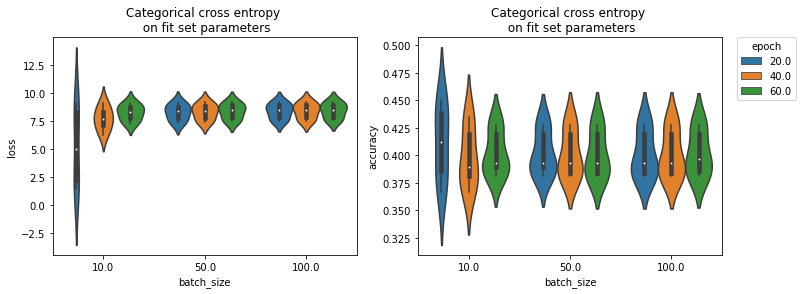

In [564]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.violinplot(y="loss", x="batch_size", hue="epoch", data=res)
plt.title("Categorical cross entropy \n on fit set parameters")
plt.legend("",frameon=False)

plt.subplot(1,2,2)
sns.violinplot(y="accuracy", x="batch_size", hue="epoch", data=res)
plt.title("Categorical cross entropy \n on fit set parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "epoch")

plt.show()

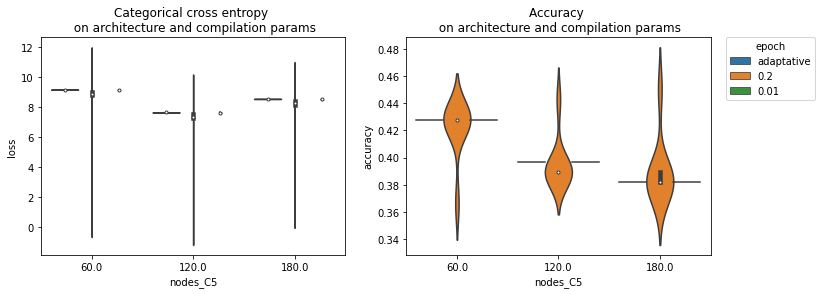

In [567]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.violinplot(y="loss", x="nodes_C5", hue="optimizer_lr", data=res)
plt.title("Categorical cross entropy \n on architecture and compilation params")
plt.legend("",frameon=False)

plt.subplot(1,2,2)
sns.violinplot(y="accuracy", x="nodes_C5", hue="optimizer_lr", data=res)
plt.title("Accuracy \n on architecture and compilation params")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "epoch")

plt.show()

Maintenant que les paramètres influents ont été sélectionnés, il faudrait les faire varier un peu plus finement, pour les choisir de façon pertinente. 

In [ ]:
batch_size_list = [10,50,100]
epoch_list = [20,40,60]
n_C5_list = [60, 120, 180]

## list of learning rate : 
tested_lr_list = list(np.arange(0.01,0.2,0.01))
tested_adaptive_list = []
for boundaries in [[10,20,30,50,40,60], [15,30,45,60], [20,40,60], [30,60]]:
    for v0 in [0.5, 0.2, 0.1]:
        values = [v0/10**(k) for k in range(len(boundaries)+1)]
        lr_schedule = schedules.PiecewiseConstantDecay(boundaries, values, "PiecewiseConstant")
        tested_adaptive_list.append(lr_schedule)

optimizer_learning_rate_list = tested_lr_list + tested_adaptive_list

## init 
kernel_size_dict = {"C1" : (5,5), "S2" : 2, "C3" : (5,5), "S4" : 2, "C5" : (5,5)}
n_nodes_dict = {"C1" : 6, "C3" : 16, "C5" : 120, "F6" : 200}
set_counter = 1
sets_dict = {}

## architecture set :
for n_C5 in n_C5_list :
    n_nodes_dict["C5"] = n_C5
    ## compile set : 
    for lr in optimizer_learning_rate_list : 
        optimizer = optimizers.SGD(learning_rate=lr)
        compile_set = {"optimizer" : optimizer}
        ## fit 
        for batch_size in batch_size_list :
            for epoch in epoch_list :
                ## save params set : 
                fit_set = {"batch_size" : batch_size,
                           "epoch" : epoch}

                set_name = "set_" + str(set_counter)
                sets_dict[set_name] = {"kernel_size_dict" : kernel_size_dict.copy(),
                                       "n_nodes_dict" : n_nodes_dict.copy(),
                                       "compile_set" : compile_set.copy(),
                                       "fit_set" : fit_set.copy()}
                ## init checkpoint : 
                checkpoint_path = RES_PATH + "CNN_train2/"+ set_name + "/cp.ckpt"
                checkpoint_dir = os.path.dirname(checkpoint_path)

                # Create a callback that saves the model's weights
                cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                                 save_weights_only=True,
                                                                 verbose=1)
                try:
                    model = lenet5_model(kernel_size_dict, n_nodes_dict)
                    model.compile(optimizer = optimizer, 
                                  loss='categorical_crossentropy',
                                   metrics=['accuracy'])
                    model.fit(x_train, y_train, 
                              batch_size=batch_size, epochs=epoch,
                              verbose=0, callbacks=[cp_callback],
                              validation_data=(x_validation, y_validation))

                except ValueError:
                    print("\t remove", batch_size, epoch  )
                set_counter += 1


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00008: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00009: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_1/cp.ckpt

Epoch 00010: saving model to /home/clairegayral/Docume


Epoch 00020: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_3/cp.ckpt

Epoch 00021: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_3/cp.ckpt

Epoch 00022: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_3/cp.ckpt

Epoch 00023: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train2/set_3/cp.ckpt


[back to menu](#menu)
<a id ="section3"></a>
<a id ="section3.1"></a>
<a id ="section3.1.1"></a>


# 3.  Transfert learning
## 3.A.  Choix du réseau et de la fonction de cût 

Pour faire le transfert d'apprentissage, le choix du réseau primo-entraîné est la première étape. D'après [cet état de l'art des réseaux de classification d'images](https://arxiv.org/abs/1605.07678) ou [cet article de blog](https://viso.ai/deep-learning/resnet-residual-neural-network/) , les réseaux ["ResNet32"](https://models.roboflow.com/classification/resnet-32) ou ["ResNet50"](), entraîné sur les données COCO, sont de bon points de départ.
Les résultats d'un primo-entraînement du réseau ResNet50 étant [proposé dans keras](https://keras.io/api/applications/resnet/#resnet50-function), je vais privilégier ce dernier.





https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751



Ref de travail :
https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1 

https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf 

https://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/ 

https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/ 

https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function 


### 3.A.a Appel au réseau primo-entraîné : 

In [1]:
%%capture
## install latest version of pytorch and detectron2:
!pip install torch==1.9.1+cpu torchvision==0.10.1+cpu torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install pyyaml==5.1
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html

In [2]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")   

1.9.1+cpu False


[back to menu](#menu)
<a id ="section3.1.2"></a>
### 3.A.a Construction du dataset d'entraînement et de test pour le transfert detectron2 :

 Vu que la bibliothèque prend en charge les preprocess et data-augmentation, je vais faire appel aux annotations avec localisation données des chiens (cela rajoute une difficulté pour l'automatisation de la data-augmentation puisqu'il faudrait suivre où est l'annotation lorsque l'on zooù, dilate, ...), puis je vais enregistrer mon ensemble d'entrainement dans detectron2.


In [24]:
list_train_filename
sample_races = ['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier',
                'n02113799-standard_poodle', 'n02097298-Scotch_terrier']

race_table = pd.DataFrame(columns=["file_name","race","label", "ref"])
for k in range(len(sample_races)):
    race = sample_races[k]
    race_table.loc[k,"file_name"] = race
    race_table.loc[k,"race"] = race.split("-")[1] 
    race_table.loc[k,"label"] = k
    race_table.loc[k,"ref"] = race.split("-")[0] 
race_table

file_name             race label        ref
0               n02110185-Siberian_husky   Siberian_husky     0  n02110185
1  n02098105-soft-coated_wheaten_terrier             soft     1  n02098105
2              n02113799-standard_poodle  standard_poodle     2  n02113799
3               n02097298-Scotch_terrier   Scotch_terrier     3  n02097298

In [13]:
## construct working df :
ann_table = pd.DataFrame()
for k in range(len(list_train_filename)):
    ann_filename = pd.DataFrame()
    filename = list_train_filename[k]
    # for filename in list_train_filename:
    ann_name = filename.split(".")[0]
    name, boxes = read_content(DATA_PATH + "train/" + ann_name)
    for l in range(boxes.shape[0]) : 
        


('n02110185_9194', [[12, 0, 359, 293]])

In [21]:
ann_filename = pd.DataFrame()
k=0
filename = list_train_filename[k]
# for filename in list_train_filename:
ann_name = filename.split(".")[0]
name, boxes = read_content(DATA_PATH + "train/" + ann_name)
for l in range(len(boxes)) :
    b = boxes[k]
    ann_filename.loc[l,"x"] = b[0]
    ann_filename.loc[l,"y"] = b[1]
    ann_filename.loc[l,"w"] = b[2]
    ann_filename.loc[l,"h"] = b[3]
ann_filename.loc[:,"filename"] = filename


In [22]:
ann_filename

x    y      w      h
0  57.0  5.0  441.0  322.0

In [11]:
def get_coco_dicts(img_dir = TRANSFERT_PATH+"train"):
    '''
    from VGG coco result, get the annotation for set of image
    from the direction d
    '''
    ## open global VGG annotations : 
    with open(RES_PATH + VGG_coco_filename) as f:
        VGG_coco = json.load(f)
    ## init
    image_df = pd.DataFrame(VGG_coco["images"])
    annotation_list = VGG_coco["annotations"]
    ## extract list of image filename (in train or val files)
    image_filenames = os.listdir(img_dir+"/")
    image_filenames =[filename for filename in image_filenames if filename[-3:] == "png"]
    image_filenames = np.sort(image_filenames)
    ## extract df :
    df_image = pd.DataFrame(VGG_coco["images"])
    df_annotation = pd.DataFrame(VGG_coco["annotations"])

    # get index where image is in img_dir file :
    idx_in_VGG_images = df_image.file_name.isin(image_filenames)
    # init res with metadata :
    res = df_image[idx_in_VGG_images].loc[:,["id","width", "height", "file_name"]]
    res = res.sort_values("id")
    res = res.to_dict("records")

    ## loop on images to add annotations
    for img_idx in range(sum(idx_in_VGG_images)):
        file_name = res[img_idx]["file_name"] = img_dir + "/" + res[img_idx]["file_name"]
        image_id = res[img_idx]["id"]
        # extract sub-df concerning image :
        img_ann = df_annotation[df_annotation.loc[:,"image_id"] == image_id]
        # drop ann not with label in label_category
        img_ann = img_ann[img_ann.category_id.isin(label_category)] 
        # get annotations 
        objs = img_ann.to_dict('records')
        for ann_idx in range(len(objs)):
            objs[ann_idx]["bbox_mode"] = BoxMode.XYWH_ABS#BoxMode.XYXY_ABS
            objs[ann_idx]["category_id"] = 0    

        if len(objs)>0 :
            res[img_idx]["annotations"] = objs
        else : 
            res[img_idx]["annotations"] = []
    return(res)

'n02110185_5871'

[back to menu](#menu)
<a id ="section4.2"></a>
## 4.B Choix de la bibliothèque pour faire le transfert

[back to menu](#menu)
<a id ="section4.3"></a>

## 4.C Remove time - consuming models